In [1]:
!gdown --id 1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO
To: /content/Precooked_pasta.csv
100% 30.8M/30.8M [00:00<00:00, 62.1MB/s]


In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [3]:
df = pd.read_csv("/content/Precooked_pasta.csv")
df

,Sample_ID,Dry_weight_content_%,Pasta_type_&_phy_con,Phy_con,Pasta_type,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.273476,0.274664,0.276380,0.278252,0.278817,...,0.029975,0.030175,0.030159,0.029962,0.029791,0.029484,0.029472,0.029682,0.029583,0.029580
1,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.264637,0.265435,0.264751,0.266426,0.266870,...,0.048597,0.048674,0.048668,0.048763,0.048775,0.048688,0.048645,0.048607,0.048330,0.048190
2,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.169046,0.167434,0.169058,0.171890,0.176521,...,0.022955,0.023029,0.023051,0.023055,0.023036,0.023008,0.022918,0.022691,0.022503,0.022539
3,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.251627,0.251486,0.259051,0.262979,0.259674,...,0.040048,0.040046,0.040003,0.039815,0.039703,0.039671,0.039672,0.039642,0.039595,0.039484
4,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.161285,0.164613,0.169598,0.167259,0.168154,...,0.052392,0.052348,0.052389,0.052460,0.052475,0.052550,0.052569,0.052479,0.052492,0.052476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.123408,0.119177,0.113905,0.116624,0.121210,...,0.045335,0.045403,0.045501,0.045496,0.045537,0.045849,0.045793,0.045396,0.045128,0.045112
1196,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.125699,0.121910,0.118119,0.118316,0.117574,...,0.043958,0.043743,0.043659,0.043489,0.043563,0.043944,0.044031,0.044185,0.044124,0.043869
1197,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.113928,0.116862,0.119997,0.113773,0.117905,...,0.045205,0.045057,0.045030,0.044883,0.044854,0.045042,0.045063,0.045013,0.044990,0.045082
1198,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.130362,0.127501,0.128886,0.131551,0.130019,...,0.046510,0.046244,0.046220,0.046381,0.046408,0.046421,0.046486,0.046521,0.046554,0.046563


In [4]:
spectra = df.values[:,5:]
classes = df.values[:,0:1]

In [5]:
spectra.shape

(1200, 2151)

## Trực quan dữ liệu phổ của 24 mẫu

In [6]:
def visualize_spectra(matrix,title):
    num_lines = matrix.shape[0]  # Số đường trên đồ thị
    plt.figure(figsize=(6, 3))
    # Vẽ đồ thị
    for i in range(num_lines):
        plt.plot(matrix[i, :])

    plt.xlabel('Wavelength')  # Nhãn trục X
    plt.ylabel('Reflectance')  # Nhãn trục Y
    plt.title(title)  # Tiêu đề đồ thị

    plt.show()  # Hiển thị đồ thị

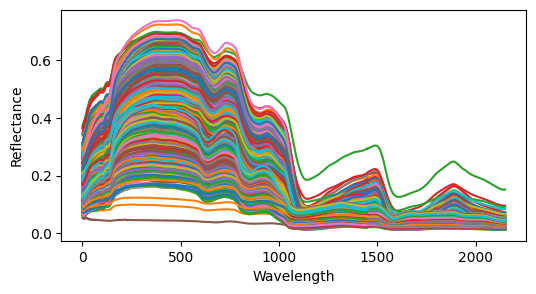

In [7]:
visualize_spectra(spectra,'')

## LDA (Linear Discriminant Analysis)

In [8]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
# Thực hiện mã hóa nhãn
encoded_classes = label_encoder.fit_transform(classes)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
Xpca = pca.fit_transform(spectra,encoded_classes)

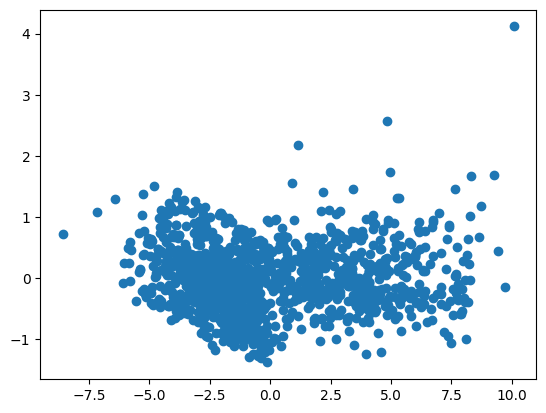

In [21]:
plt.scatter(Xpca[:,0],Xpca[:,1])

## LDA + SVM

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(Xpca, encoded_classes, test_size=0.4, random_state=101)

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Khởi tạo mô hình SVM
model = svm.SVC(kernel='linear')
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)
# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy*100)

ValueError: ignored

## LDA + RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy*100)

Độ chính xác: 61.875


## Multilayer Neural Network

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Khởi tạo bộ mã hóa OneHotEncoder
encoder = OneHotEncoder(categories='auto')

# Thực hiện one-hot encoding
encoded_classes = encoder.fit_transform(encoded_classes.reshape(-1, 1)).toarray()

# In one-hot encoding
print(encoded_classes)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
# X_train.shape

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(spectra, encoded_classes, test_size=0.3, random_state=2)

In [ ]:
import tensorflow as tf

X_train = X_train.astype(float)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

X_test = X_test.astype(float)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Khởi tạo mô hình MLP
model = Sequential()
model.add(Dense(1500, activation='relu', input_dim=2151))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))


model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
# Định nghĩa callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs=100,batch_size = 32,validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 2s 13ms/step - loss: 3.2125 - accuracy: 0.0345 - val_loss: 3.1887 - val_accuracy: 0.0306
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 3.1592 - accuracy: 0.0405 - val_loss: 3.1028 - val_accuracy: 0.0306
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 2.9549 - accuracy: 0.0679 - val_loss: 2.6484 - val_accuracy: 0.1167
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 2.5875 - accuracy: 0.1107 - val_loss: 2.4933 - val_accuracy: 0.1111
Epoch 5/100
27/27 [==============================] - 0s 9ms/step - loss: 2.4736 - accuracy: 0.1167 - val_loss: 2.4622 - val_accuracy: 0.1222
Epoch 6/100
27/27 [==============================] - 0s 9ms/step - loss: 2.3783 - accuracy: 0.1369 - val_loss: 2.3611 - val_accuracy: 0.1833
Epoch 7/100
27/27 [==============================] - 0s 8ms/step - loss: 2.2985 - accuracy: 0.1738 - val_loss: 2.3482 - val_accuracy: 0.1556
Epoch 8/100


## CNN Approach

In [ ]:
def extract_to_pseudo_image(matrix):
  extract_matrix = matrix[:,0:1]
  for i in range(2,matrix.shape[1],2):
    extract_matrix = np.concatenate((extract_matrix, matrix[:,i:i+1]), axis=1)
  extract_matrix  = extract_matrix[:,0:1058]
  extract_matrix = extract_matrix.astype(float)
  extract_matrix = tf.convert_to_tensor(extract_matrix)
  extract_matrix = tf.reshape(extract_matrix, (extract_matrix.shape[0],23, 23, 2))
  return extract_matrix

In [ ]:
pseudo_image = extract_to_pseudo_image(spectra)

# In ma trận
print(pseudo_image.shape)

(1200, 23, 23, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spectra, encoded_classes, test_size=0.3, random_state=2)

In [ ]:
X_train = extract_to_pseudo_image(X_train)
X_test = extract_to_pseudo_image(X_test)

In [ ]:
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

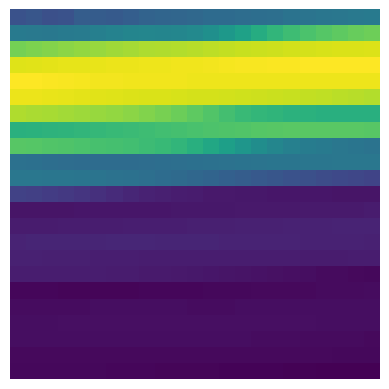

In [ ]:
X_train[0][:,:,0].shape
# Hiển thị hình ảnh từ tensor
plt.imshow(X_train[100][:,:,1])
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input

def TeaNet():

  inputs = Input(shape=(23, 23, 2))
  x = layers.Conv2D(kernel_size=3, filters=16, padding="same")(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Conv2D(kernel_size=3, filters=32, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.Conv2D(kernel_size=3, filters=64, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(24, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=x)
  return model

In [ ]:
model_TeaNet = TeaNet()

In [ ]:
model_TeaNet.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 23, 23, 2)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 23, 23, 16)        304       
                                                                 
 batch_normalization_24 (Bat  (None, 23, 23, 16)       64        
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 23, 23, 16)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 23, 23, 32)        4640      
                                                                 
 batch_normalization_25 (Bat  (None, 23, 23, 32)       128       
 chNormalization)                                          

In [ ]:
# model_TeaNet.compile(optimizer='adam',
#               loss= 'categorical_crossentropy',
#               metrics=['accuracy'])
# model_TeaNet.fit(X_train, y_train, epochs=1000,batch_size = 32,validation_data=(X_test, y_test))

## CNN Approach (Residual)

In [ ]:
def residual_block(x, filters):

  x1 = layers.Conv2D(kernel_size=1, filters=filters, padding="same")(x)
  x1 = layers.BatchNormalization()(x1)

  x2 = layers.Conv2D(kernel_size=3, filters=filters, padding="same")(x)
  x2 = layers.BatchNormalization()(x2)
  x2 = layers.ReLU()(x2)
  x2 = layers.Conv2D(kernel_size=3, filters=filters, padding="same")(x2)
  x2 = layers.BatchNormalization()(x2)

  out = layers.Concatenate()([x1, x2])
  out = layers.ReLU()(out)

  return out

def TeaResnet():

  inputs = Input(shape=(23, 23, 2))
  x = residual_block(inputs,16)
  x = residual_block(x,32)
  x = residual_block(x,64)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(24, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=x)
  return model

In [ ]:
model_TeaResnet = TeaResnet()

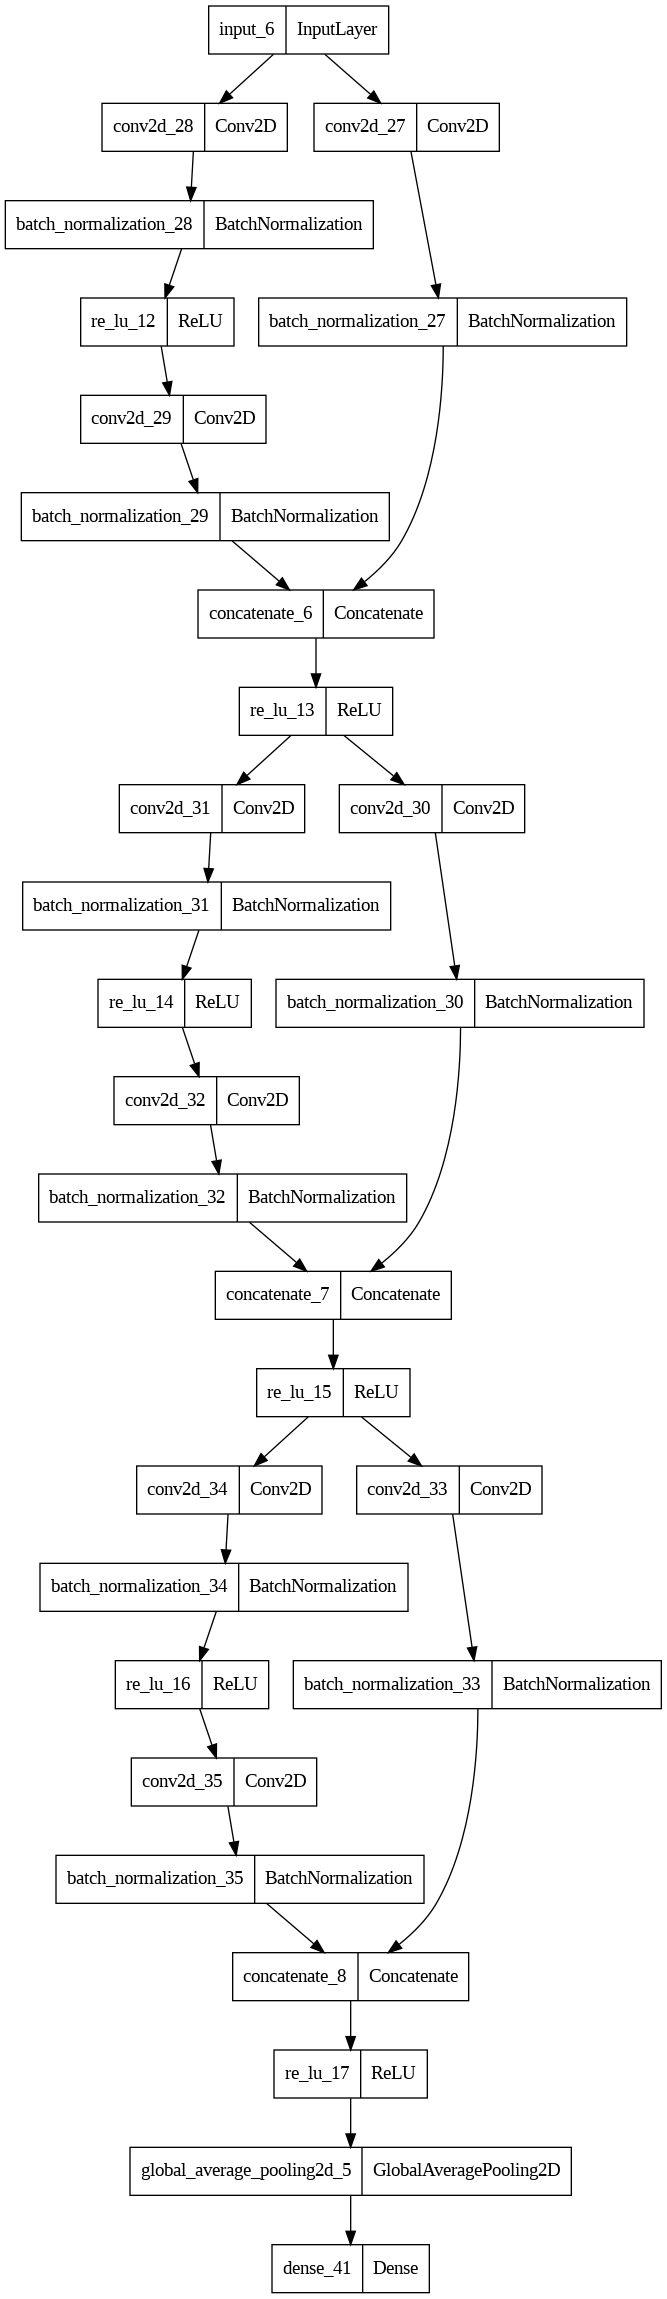

In [ ]:
tf.keras.utils.plot_model(model_TeaResnet)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model_TeaResnet.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
# Định nghĩa callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model_TeaResnet.fit(X_train, y_train, epochs=1000,batch_size = 32,validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/1000
27/27 [==============================] - 7s 26ms/step - loss: 2.9172 - accuracy: 0.1155 - val_loss: 3.1772 - val_accuracy: 0.0389
Epoch 2/1000
27/27 [==============================] - 0s 13ms/step - loss: 2.5538 - accuracy: 0.1869 - val_loss: 3.2488 - val_accuracy: 0.0417
Epoch 3/1000
27/27 [==============================] - 0s 14ms/step - loss: 2.3960 - accuracy: 0.2083 - val_loss: 3.4529 - val_accuracy: 0.0389
Epoch 4/1000
27/27 [==============================] - 0s 12ms/step - loss: 2.3456 - accuracy: 0.1940 - val_loss: 3.6997 - val_accuracy: 0.0250
